Part 1: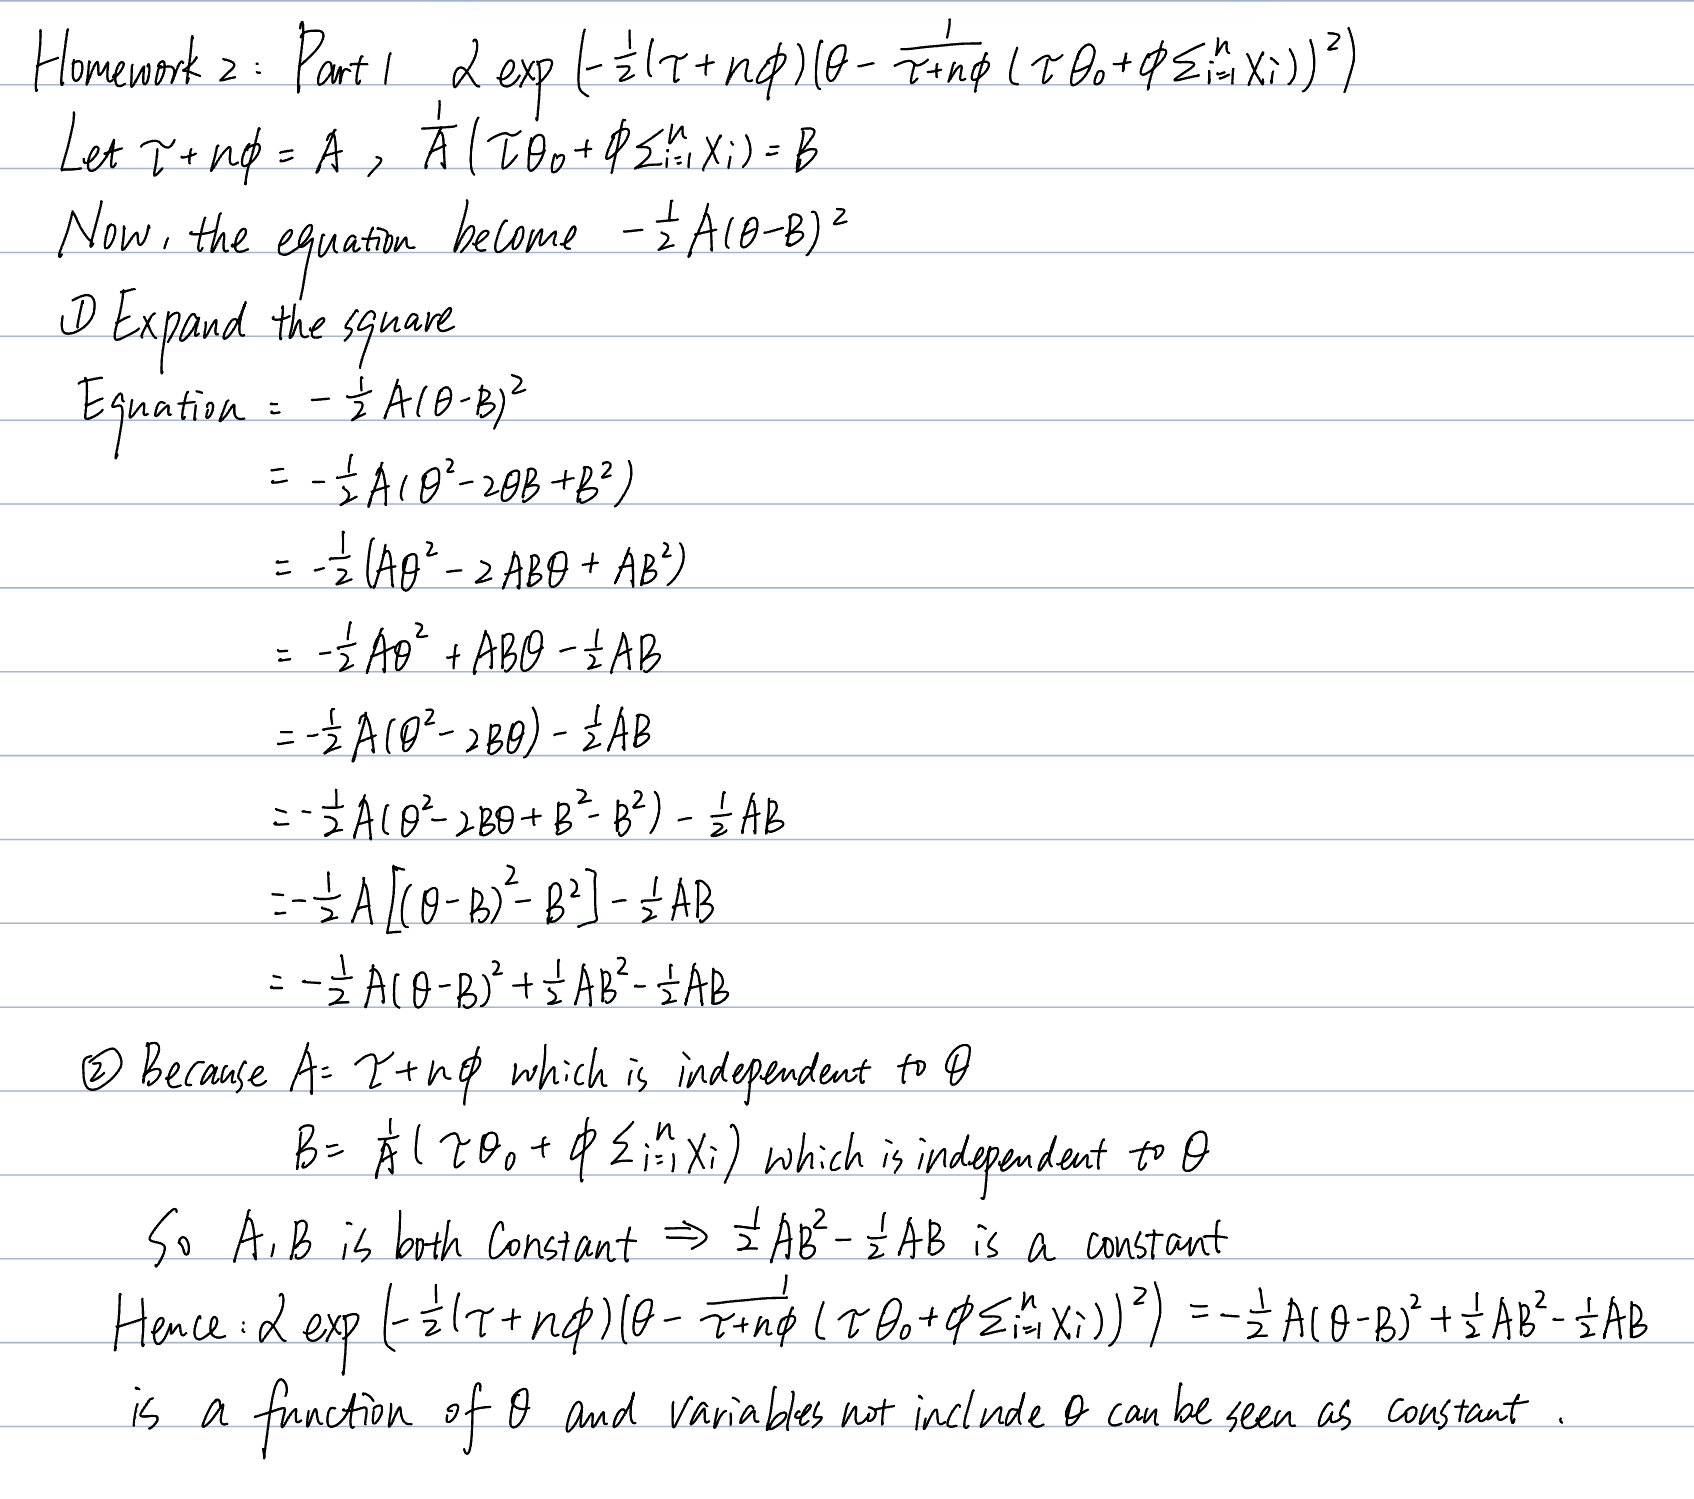


Part II: Complete the following.
a) Make the “Classic Bayes” figure, but instead of a single likelihood, plot the individual likelihoods of each observation. Hint: Consider the code. 
for xi in range(x):
print(xi)

Text(0.5, 1.0, 'Likelihood')

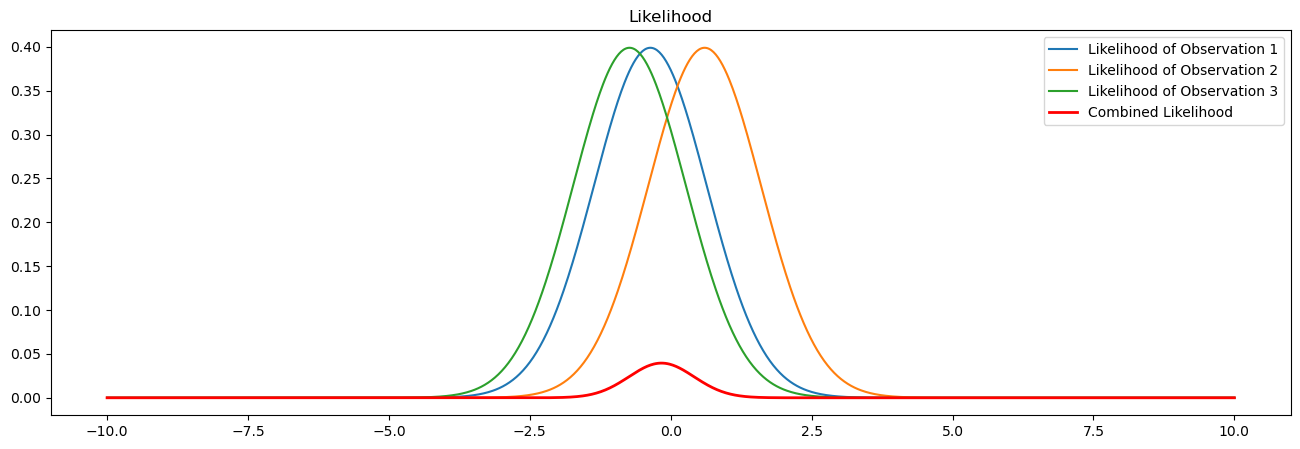

In [13]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
# Setting a random seed 
np.random.seed(578)
# Defining number of observations and parameter domain
n = 3
parameter_domain = np.linspace(-10, 10, 1001)
# Generating three random observations
observations = stats.norm(loc=0, scale=1).rvs(n)
# Plotting the likelihoods
plt.figure(figsize=(16, 5))
likelihood_total = np.ones_like(parameter_domain) 
for i in range(n):
    obs = observations[i]
    # Calculating the likelihood for each observation
    likelihood = stats.norm.pdf(obs, loc=parameter_domain, scale=1)
    likelihood_total *= likelihood 
    # Plot each likelihood
    plt.plot(parameter_domain, likelihood, label=f'Likelihood of Observation {i + 1}')
# Plot the combined product likelihood
plt.plot(parameter_domain,likelihood_total, label="Combined Likelihood", color='red', linewidth=2)
plt.legend()
plt.title("Likelihood")

b) Make the “Classic Bayes” figure for the normal-normal model on a log scale. Hint: plot loglikehood, prior logpdf, and the log of the joint distribution using stats.norm.logpdf()

Text(0.5, 1.0, 'Classic Bayes Figure on Log Scale')

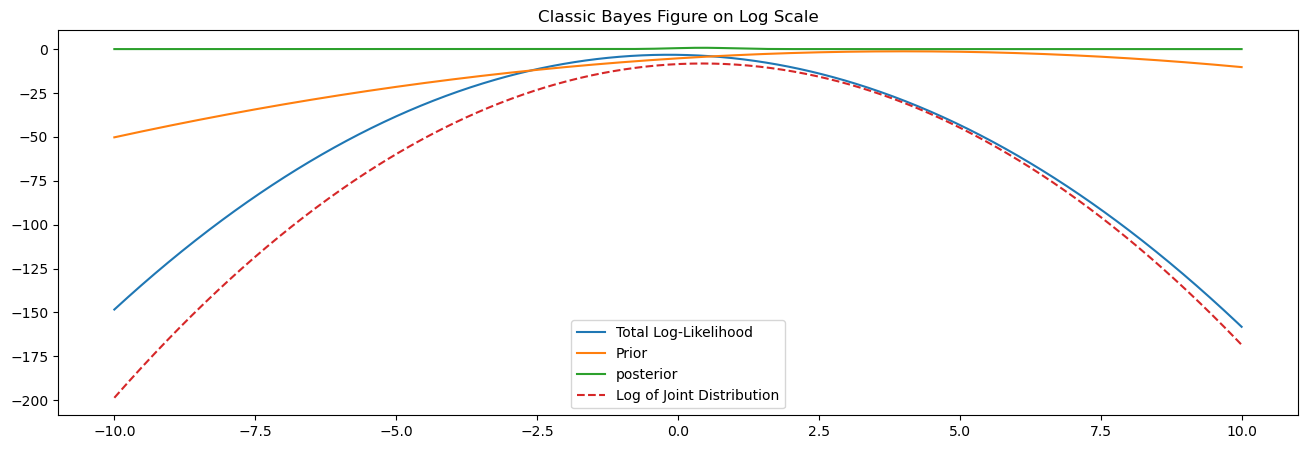

In [33]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
# Setting a random seed 
np.random.seed(578)
# Defining number of observation, parameter domain and prior parameter
n = 3
parameter_domain = np.linspace(-10, 10, 1001)
theta_0, tau = 4, 1/2
# Generating three random observations
observations = stats.norm(loc=0, scale=1).rvs(n)
log_likelihood_total = np.zeros_like(parameter_domain)
# Computing log-likelihoods
for i in range(n):
    obs = observations[i]
    log_likelihood = stats.norm.logpdf(obs, loc=parameter_domain, scale=1)
    log_likelihood_total += log_likelihood
# Computing the log-prior
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain)
# Computing the joint distribution 
joint = log_likelihood_total + prior
# Computing the posterior
posterior = stats.norm(loc=(tau*theta_0+observations.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)
# Plotting
plt.figure(figsize=(16, 5))
plt.plot(parameter_domain, log_likelihood_total, label="Total Log-Likelihood")
plt.plot(parameter_domain, prior, label="Prior")
plt.plot(parameter_domain, posterior, label="posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="Log of Joint Distribution")
plt.legend()
plt.title("Classic Bayes Figure on Log Scale")

c) What is the posterior distribution of a normal likelihood with p(θ) ∝ 1?

In [40]:
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
# Setting a random seed 
np.random.seed(578)
# Defining number of observation, parameter domain and prior parameter
n = 3
parameter_domain = np.linspace(-10, 10, 1001)
theta_0, tau = 4, 1/2
# Generating three random observations
observations = stats.norm(loc=0, scale=1).rvs(n)
posterior_mean = (tau * theta_0 + np.sum(observations)) / (n + tau)
posterior_std = 1 / np.sqrt(n + tau)
print(posterior_mean)
print(posterior_std)

0.4309167547260235
0.5345224838248488


d)What’s the difference between a log likelihood and log posterior when an improper prior is used? Hint: is has something to do with the log of the marginal likelihood constant. Or, another way to start thinking about this is to instead as the question: What’s the difference between a likelihood and posterior when an improper prior is used? Hint: is has something to do with the marginal likelihood constant.

Ans: When improper priors are used, the key difference between likelihood and posterior has to do with the marginal likelihood constant. Likelihood focuses on data fitting, but does not include prior information or constants. Howeverd, a posteriori takes into account the constant z, the prior information, and the constant to ensure its integral. Improper prior existence can affect the process of calculation and thus affect the posterior.